In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv(r"C:\CHRIST\Cognifyz\Dataset .csv")

In [4]:
# View top 10 rows of the dataset
print(df.head(10))

   Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
1        6304287                          Izakaya Kikufuji           162   
2        6300002                    Heat - Edsa Shangri-La           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
5       18189371                              Din Tai Fung           162   
6        6300781                                Buffet 101           162   
7        6301290                                   Vikings           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati 

### Task 1: PREDICTIVE MODELLING 

In [27]:
# Ensure the required columns exist before processing
if "Has Table booking" in df.columns:
    df["Has_Table_Booking_Num"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
else:
    print("Warning: 'Has Table booking' column not found in dataset.")

if "Has Online delivery" in df.columns:
    df["Has_Online_Delivery_Num"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})
else:
    print("Warning: 'Has Online delivery' column not found in dataset.")

In [6]:
# Selecting relevant features for predictive modeling
features = ["Average Cost for two", "Votes", "Price range", "Has_Table_Booking_Num", "Has_Online_Delivery_Num"]
target = "Aggregate rating"

In [28]:
# Handling missing values
df[target] = pd.to_numeric(df[target], errors="coerce")
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=[target])
for feature in features:
    if feature in df.columns:
        df[feature] = df[feature].fillna(df[feature].median())

In [29]:
# Splitting the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

In [32]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}
    
    print(f"{name} Performance:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

Linear Regression Performance:
  MAE: 1.0751
  RMSE: 1.2948
  R² Score: 0.2634

Decision Tree Performance:
  MAE: 0.2856
  RMSE: 0.4525
  R² Score: 0.9100

Random Forest Performance:
  MAE: 0.2364
  RMSE: 0.3661
  R² Score: 0.9411

Support Vector Machine Performance:
  MAE: 0.8416
  RMSE: 1.1725
  R² Score: 0.3960



In [33]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                             MAE      RMSE  R2 Score
Linear Regression       1.075071  1.294790  0.263445
Decision Tree           0.285603  0.452540  0.910025
Random Forest           0.236397  0.366146  0.941100
Support Vector Machine  0.841604  1.172540  0.395965


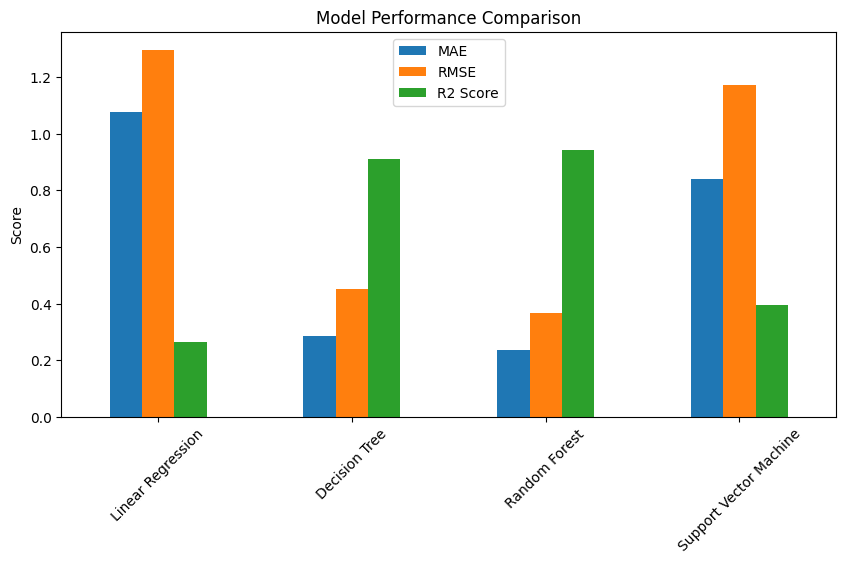

In [34]:
# Visualizing model performance
results_df.plot(kind='bar', figsize=(10, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Task 2: CUSTOMER PREFERENCE ANALYSIS 

In [35]:
# Identify the top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10).index

In [36]:
# Subset the data for only the top 10 cuisines
data_top_cuisines = df[df['Cuisines'].isin(top_cuisines)]

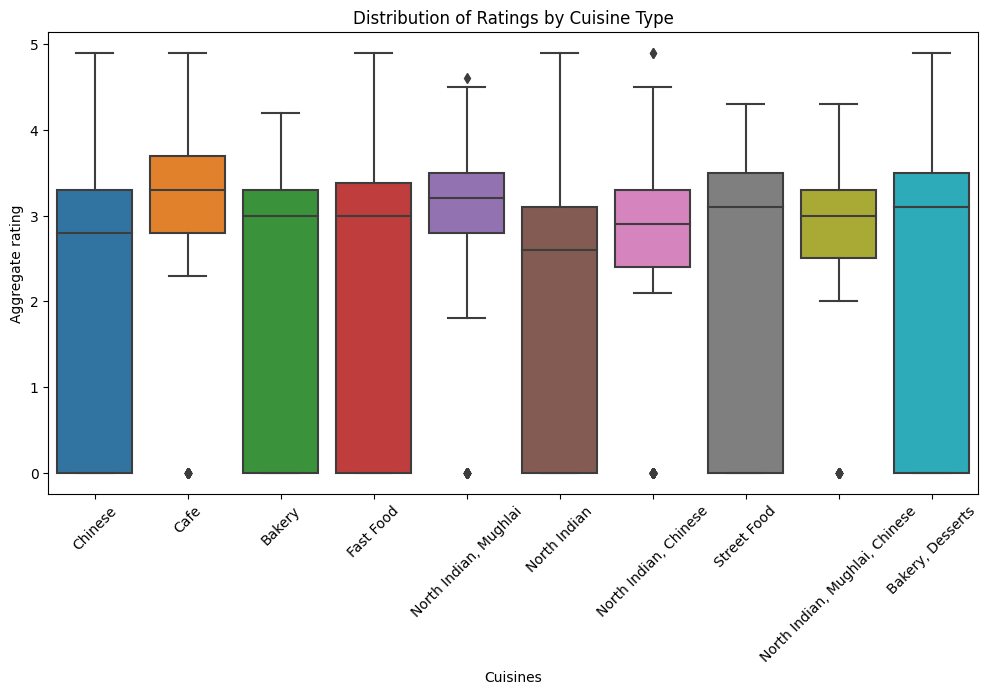

In [37]:
# Create a box plot to visualize the distribution of ratings for each cuisine type (top 10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=data_top_cuisines)
plt.xticks(rotation=45)
plt.title("Distribution of Ratings by Cuisine Type")
plt.show()

In [38]:
# Identify the most popular cuisines among customers based on the number of votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().reset_index().sort_values(by='Votes', ascending=False).head(10)
print("Top 10 Most Popular Cuisines by Votes:")
print(popular_cuisines)

Top 10 Most Popular Cuisines by Votes:
                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


In [39]:
# Determine if there are any specific cuisines that tend to receive higher ratings
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index().sort_values(by='Aggregate rating', ascending=False).head(10)
print("Top 10 Cuisines with Highest Average Ratings:")
print(average_ratings)

Top 10 Cuisines with Highest Average Ratings:
                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


### Task 3: DATA VISUALIZATION 

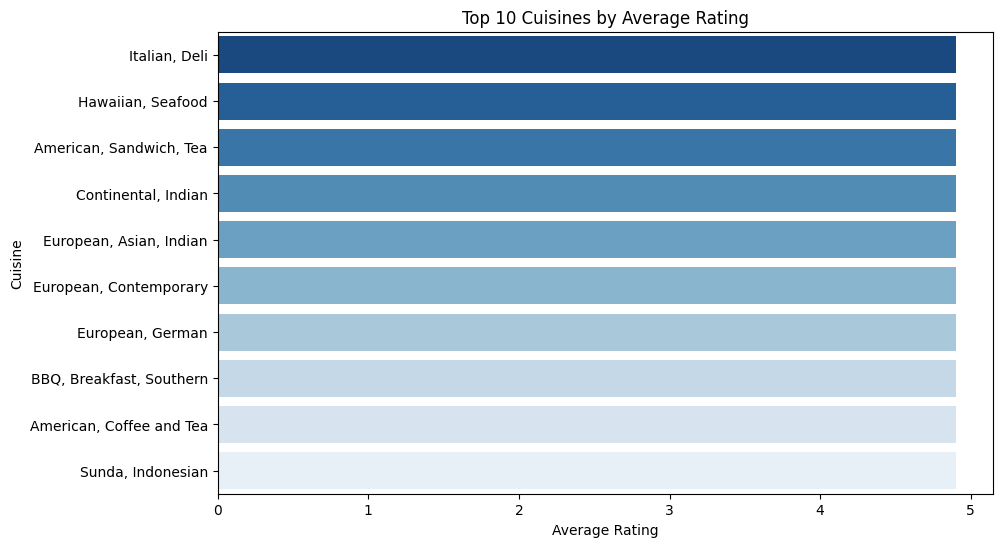

In [41]:
# Compare the average ratings of different cuisines using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=average_ratings['Cuisines'], x=average_ratings['Aggregate rating'], palette="Blues_r")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

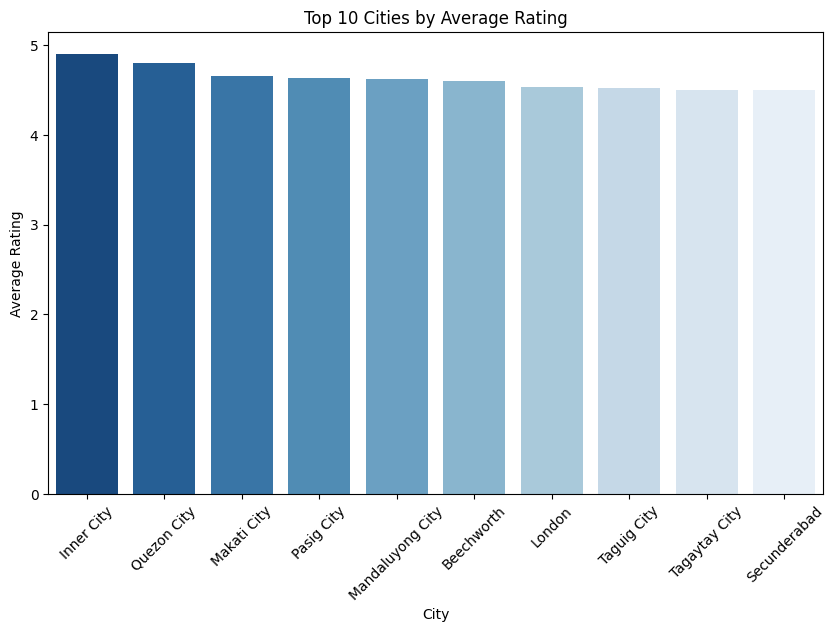

In [42]:
# Compare the average ratings of different cities
average_ratings_city = df.groupby('City')['Aggregate rating'].mean().reset_index().sort_values(by='Aggregate rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_city['City'], y=average_ratings_city['Aggregate rating'], palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Top 10 Cities by Average Rating")
plt.show()